### artificial neural network

Read the theory at this good site: http://neuralnetworksanddeeplearning.com/index.html

Do not get too hung up on the calculus math, but try to understand various vocabularies.

Perceptrons, Weghts, Bias, Activation Function, Stochastic Gradient Decent,
Input layer, Hidden Layer, Output Layer

The following code will implement the multi layer perceptron to predict hand-written digits ( MNIST data )
![ann.png](ann.png)

The input layer is 28x28 pixels => 768

The hidden layer has 256 nodes

And the output layer has 10 nodes, where each node represents the probability associated with eadch digit

In [31]:
import numpy as np

# import keras from tensorflow or just import keras
from tensorflow import keras

# show which backend I am using
print('keras version:', keras.__version__)
print('keras backend:', keras.backend.backend())

keras version: 2.2.4-tf
keras backend: tensorflow


In [32]:
#load data
# either hand written digits or fashion mnist

data = keras.datasets.mnist
#data = keras.datasets.fashion_mnist

In [33]:
# this command actually downloads the data once and caches it
(x_train, y_train), (x_test, y_test) = data.load_data()

In [34]:
# show the shape of the data

print('train shape:', x_train.shape)
print('train y:', y_train.shape)
print('test_shape:', x_test.shape)
print('test y:', y_test.shape)

num_labels = len(np.unique(y_train))
image_size = x_train.shape[1]
input_shape = image_size * image_size

print('num of labels:', num_labels)
print('image size:', image_size)
print('input shape:', input_shape)


train shape: (60000, 28, 28)
train y: (60000,)
test_shape: (10000, 28, 28)
test y: (10000,)
num of labels: 10
image size: 28
input shape: 784


In [35]:
#reshape to flat 784 and normalize to 0.0 to 1.0

x_train2 = x_train.reshape( x_train.shape[0] , input_shape)
x_train2 = x_train2.astype('float32') / 255

x_test2 = x_test.reshape(x_test.shape[0],input_shape)
x_test2 = x_test2.astype('float32') / 255

#hot encode
y_train2 = keras.utils.to_categorical(y_train)
y_test2 = keras.utils.to_categorical(y_test)

In [36]:
print("revised x_train shape:", x_train2.shape)
print('revised y_train shape:', y_train2.shape)
print('revised x_test shape:', x_test2.shape)
print('revised y_test shape:', y_test2.shape)

revised x_train shape: (60000, 784)
revised y_train shape: (60000, 10)
revised x_test shape: (10000, 784)
revised y_test shape: (10000, 10)


In [37]:
# so called hyper parameters

num_hidden_layers = 512
epochs=30
batch_size=256

In [38]:
#model
model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(num_hidden_layers, input_shape=(input_shape,), activation='relu'))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
# using SGD optimizer with the defaults:
# keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

optimizer = keras.optimizers.SGD()

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
#train the model with train data
fit_history = model.fit(x_train2, y_train2,
  epochs=epochs ,
  batch_size=batch_size,
  validation_data=(x_test2,y_test2)
)

# evaluate how the model does against the test data
print(model.evaluate(x_test2 , y_test2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 24us/sample - loss: 1.4531 - acc: 0.6851 - val_loss: 0.8914 - val_acc: 0.8432
Epoch 2/30
60000/60000 [==============================] - 1s 23us/sample - loss: 0.7379 - acc: 0.8500 - val_loss: 0.5912 - val_acc: 0.8747
Epoch 3/30
60000/60000 [==============================] - 1s 23us/sample - loss: 0.5565 - acc: 0.8698 - val_loss: 0.4846 - val_acc: 0.8866
Epoch 4/30
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4780 - acc: 0.8805 - val_loss: 0.4295 - val_acc: 0.8933
Epoch 5/30
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4331 - acc: 0.8877 - val_loss: 0.3959 - val_acc: 0.8989
Epoch 6/30
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4033 - acc: 0.8929 - val_loss: 0.3716 - val_acc: 0.9030
Epoch 7/30
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3817 - acc: 0.8974 - val_loss: 0.

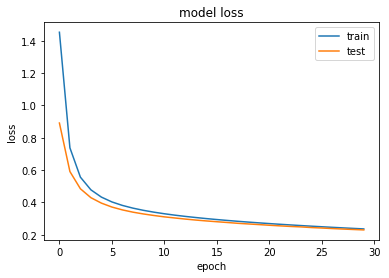

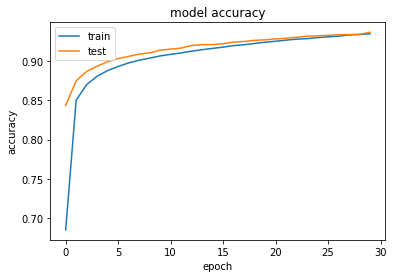

In [40]:
# display the data
%matplotlib inline
from matplotlib import pyplot as plt

# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()